In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from data_gen_reg import Generate

In [3]:
gen = Generate(50)

In [4]:
df = gen.make_data()
df.head()


,X,y
0,0.0,6.501042
1,1.0,7.752764
2,2.0,17.576598
3,3.0,25.493910
4,4.0,10.573422


In [5]:
X = df[["X"]].values
y = df[["y"]].values

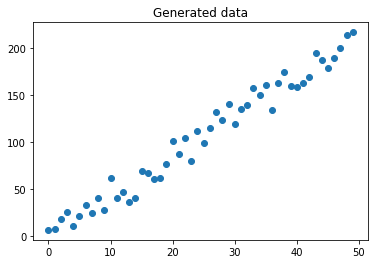

In [6]:
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [7]:
from linear_reg import Linear_reg

In [8]:
lr =  Linear_reg()

In [9]:

TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
NUM_SAMPLES = 50

In [10]:
indices = list(range(50))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [11]:
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [12]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [13]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [14]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [15]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [16]:
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 0.2, std: 0.8
mean: 0.3, std: 0.9


In [17]:
lr.train(X_train , y_train)

 epoch 0 training loss 1.7045030273525432e-31
 epoch 1000 training loss 1.0177714357538946e-31
 epoch 2000 training loss 8.736018227740501e-32
 epoch 3000 training loss 4.314083075427408e-33
 epoch 4000 training loss 1.862979548490693e-31
 epoch 5000 training loss 7.131443451216735e-33
 epoch 6000 training loss 1.2678121691051974e-32
 epoch 7000 training loss 3.178334673937335e-32
 epoch 8000 training loss 1.0653143920953395e-32
 epoch 9000 training loss 8.80425117434165e-33


In [18]:
preds = lr.predict(X_test)

In [19]:
preds

array([[-0.01321694],
       [-0.40972502],
       [-0.54189438],
       [ 1.30847667],
       [-0.74014842],
       [ 1.50673071],
       [ 0.97805327],
       [-0.21147098]])

In [20]:
W,b = lr.get_parameters()

In [21]:
1/(len(preds))*(np.sum(y_test - preds)**2)

0.0026475190573664186

In [22]:
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
W_unscaled,b_unscaled

(array([[4.19406113]]), 1.0229397309748407)

In [23]:
pred_train = X_train*W + b

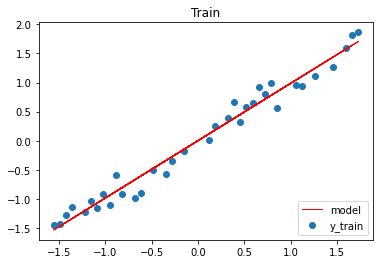

In [24]:
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")